In [57]:
import seaborn as sns
import pandas as pd

performance=pd.read_csv('DBinsertion_performance.csv',header=None)



In [58]:
performance.rename(columns={0: 'operation',
                   1: 'file_name',
                   2: 'start_datetime',
                   3: 'end_datetime',
                   4: 'duration',
                   5: 'iteration'},inplace=True)

In [59]:
import datetime

diff=[]
for idx in performance.index:
    time_diff=datetime.datetime.strptime(performance.loc[idx,'end_datetime'][:-3],'%Y-%m-%d %H:%M:%S.%f')-datetime.datetime.strptime(performance.loc[idx,'start_datetime'][:-3],'%Y-%m-%d %H:%M:%S.%f')
    diff.append(time_diff.total_seconds())

performance['time_diff']=diff


In [62]:
performance['duration']=performance['duration'].astype('float64')*60

In [89]:
performance.head()

,operation,file_name,start_datetime,end_datetime,duration,iteration,time_diff
0,insertion,ENCFF469GFN.bam,2022-10-02 18:41:26.370110352,2022-10-02 18:43:20.635250352,114.265142,1,114.265140
1,insertion,ENCFF469GFN.bam,2022-10-02 18:42:30.805552330,2022-10-02 18:44:29.124742363,118.085133,2,118.319190
2,insertion,ENCFF469GFN.bam,2022-10-02 18:44:29.560258381,2022-10-02 18:46:27.419336955,117.510649,3,117.859078
3,insertion,ENCFF469GFN.bam,2022-10-02 18:46:27.872461459,2022-10-02 18:48:47.870063809,139.684420,4,139.997602
4,insertion,ENCFF469GFN.bam,2022-10-02 18:48:48.423441951,2022-10-02 18:51:14.131257548,145.383935,5,145.707816


In [90]:
performance_samtools=pd.read_csv('sortindex_performance.csv',header=None)

In [91]:
performance_samtools.rename(columns={0: 'operation',
                   1: 'file_name',
                   2: 'start_datetime',
                   3: 'end_datetime',
                   4: 'iteration'},inplace=True)

In [92]:
diff=[]
for idx in performance_samtools.index:
    time_diff=datetime.datetime.strptime(performance_samtools.loc[idx,'end_datetime'][:-3],'%Y-%m-%d %H:%M:%S.%f')-datetime.datetime.strptime(performance_samtools.loc[idx,'start_datetime'][:-3],'%Y-%m-%d %H:%M:%S.%f')
    diff.append(time_diff.total_seconds())

performance_samtools['time_diff']=diff

In [94]:
performance_samtools.head()

,operation,file_name,start_datetime,end_datetime,iteration,time_diff
0,indexing_sorting,ENCFF469GFN.bam,2022-10-02 21:20:24.289153795,2022-10-02 21:22:03.625280500,1,99.336127
1,indexing_sorting,ENCFF469GFN.bam,2022-10-02 21:22:03.718336334,2022-10-02 21:23:48.540867803,2,104.822531
2,indexing_sorting,ENCFF469GFN.bam,2022-10-02 21:23:48.624867976,2022-10-02 21:25:26.425781043,3,97.800914
3,indexing_sorting,ENCFF469GFN.bam,2022-10-02 21:25:26.525680905,2022-10-02 21:27:04.275303254,4,97.749623
4,indexing_sorting,ENCFF469GFN.bam,2022-10-02 21:27:04.367831664,2022-10-02 21:28:42.310862688,5,97.943031


In [105]:
performace_db=pd.DataFrame({'insertion SQL db':performance['duration'],'Samtools: sort + index':performance_samtools['time_diff']})

(70.0, 176.07991496298294)

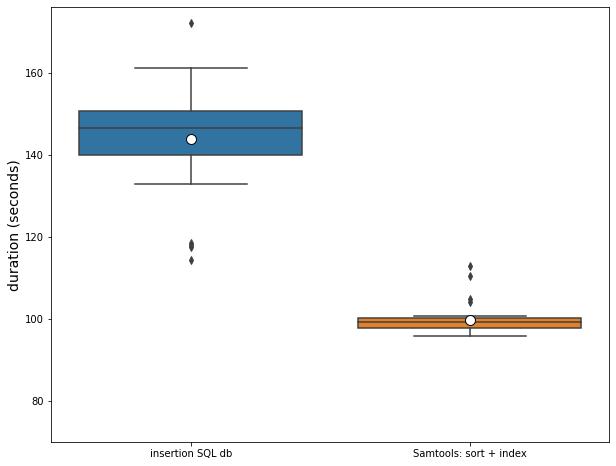

In [109]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
boxplot=sns.boxplot(data=performace_db,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.ylabel("duration (seconds)",size=14)
plt.ylim(bottom=70)

In [113]:
import numpy as np
print(np.mean(performance_samtools['time_diff']))
print(np.std(performance_samtools['time_diff']))

99.83112099999998
3.704630506848944
